In [ ]:
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib




class Cell:

    # A wall separates a pair of cells in the N-S or W-E directions.
    wall_pairs = {"North": "South", "South": "North", "East": "West", "West": "East"}

    def __init__(self, x, y):
        """Initialize the cell at (x,y). At first it is surrounded by walls."""

        self.x, self.y = x, y
        self.walls = {"North": True, "South": True, "East": True, "West": True}
        self.entrance = None
        self.exit = None

    def has_all_walls(self):
        """Does this cell still have all its walls?"""

        return all(self.walls.values())

    def knock_down_wall(self, other, wall):
        """Knock down the wall between cells self and other."""

        self.walls[wall] = False
        other.walls[Cell.wall_pairs[wall]] = False


class Maze:
    """A Maze, represented as a grid of cells."""

    def __init__(self, nx, ny, ix=0, iy=0):
        """Initialize the maze grid.
        The maze consists of nx x ny cells and will be constructed starting
        at the cell indexed at (ix, iy).

        """

        self.nx, self.ny = nx, ny
        self.ix, self.iy = ix, iy
        self.maze_map = [[Cell(x, y) for y in range(ny)] for x in range(nx)]

    def cell_at(self, x, y):
        """Return the Cell object at (x,y)."""

        return self.maze_map[x][y]

    def __str__(self):
        """Return a (crude) string representation of the maze."""

        maze_rows = ["-" * self.nx * 2]
        for y in range(self.ny):
            maze_row = ["|"]
            for x in range(self.nx):
                if self.maze_map[x][y].walls["East"]:
                    maze_row.append(" |")
                else:
                    maze_row.append("  ")
            maze_rows.append("".join(maze_row))
            maze_row = ["|"]
            for x in range(self.nx):
                if self.maze_map[x][y].walls["South"]:
                    maze_row.append("-+")
                else:
                    maze_row.append(" +")
            maze_rows.append("".join(maze_row))
        return "\n".join(maze_rows)

    def plot(self):
        """Plots the maze in matplotlib."""
        maze = [[0 for _ in range(self.nx * 2 + 1)]]
        for y in range(self.ny):
            row1 = [0]  # start each row with a wall
            row2 = [0]
            for x in range(self.nx):
                if not self.maze_map[x][y].walls["East"]:
                    row1.append(1)  # spaces are ones and walls are zeros
                    row1.append(1)
                else:
                    row1.append(1)
                    row1.append(0)
                if self.maze_map[x][y].walls["South"]:
                    row2.append(0)
                    row2.append(0)
                else:

                    row2.append(1)
                    row2.append(0)
            maze.append(row1)
            maze.append(row2)
        maze[self.entrance * 2 + 1][0] = 1  # open entrance and exit
        maze[self.exit * 2 + 1][-1] = 1
        _, ax = plt.subplots()

        # type hint for lsp
        ax: matplotlib.axes.Axes = ax
        ax.pcolormesh(maze, cmap='gray')
        # plt.pcolormesh(maze)
        ax.set_aspect("equal")
        # plt.axes().set_aspect("equal")  # set the x and y axes to the same scale
        plt.xticks([])  # remove the tick marks by setting to an empty list
        plt.yticks([])  # remove the tick marks by setting to an empty list
        # plt.axes().invert_yaxis()  # invert the y-axis so the first row of data is at the top
        # plt.savefig("tet.png")
        ax.invert_yaxis()

        plt.show()

    def find_valid_neighbours(self, cell):
        """Return a list of unvisited neighbours to cell."""

        directions = [("West", (-1, 0)), ("East", (1, 0)), ("South", (0, 1)), ("North", (0, -1))]
        neighbours = []
        for direction, (dx, dy) in directions:
            x2, y2 = cell.x + dx, cell.y + dy
            if (0 <= x2 < self.nx) and (0 <= y2 < self.ny):
                neighbour = self.cell_at(x2, y2)
                if neighbour.has_all_walls():
                    neighbours.append((direction, neighbour))
        return neighbours

    def make_maze(self):
        # Total number of cells.
        n = self.nx * self.ny
        cell_stack = []
        current_cell = self.cell_at(self.ix, self.iy)
        # Total number of visited cells during maze construction.
        nv = 1

        while nv < n:
            neighbours = self.find_valid_neighbours(current_cell)

            if not neighbours:
                # We've reached a dead end: backtrack.
                current_cell = cell_stack.pop()
                continue
            # Choose a random neighbouring cell and move to it.
            direction, next_cell = random.choice(neighbours)
            current_cell.knock_down_wall(next_cell, direction)
            cell_stack.append(current_cell)
            current_cell = next_cell
            nv += 1
        for y in range(self.ny):
            if self.maze_map[y][0].walls["East"] or self.maze_map[y][0].walls["South"]:
                self.entrance = y
                break
        for y in range(self.ny - 1, 0, -1):
            if self.maze_map[y][0].walls["West"] or self.maze_map[y][0].walls["North"]:
                self.exit = y
                break


--------------------
| |               | |
| + +-+-+ +-+-+-+ + +
| |   | |   |       |
| +-+ + +-+ +-+-+-+ +
| | |     |       | |
| + + +-+-+-+-+-+ + +
| |   |       |   | |
| +-+-+ +-+-+ + +-+ +
| |   | |     |   | |
| + + + + +-+-+ + + +
|   |   |   |   | | |
|-+-+-+-+-+ +-+-+ + +
|   |       |     | |
| + + +-+-+-+ +-+-+-+
| |   |     |       |
| +-+-+ + + + +-+-+ +
|   |   | | |   |   |
|-+ +-+-+ + +-+-+ + +
|         |       | |
|-+-+-+-+-+-+-+-+-+-+


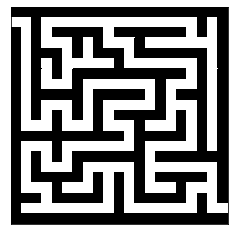

In [ ]:
szzzzzzzznx, ny = 10, 10
# Maze entry position
ix, iy = 0, 0

maze = Maze(nx, ny, ix, iy)
maze.make_maze()
print(maze)
maze.plot()


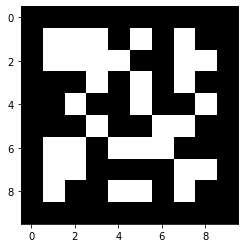

In [ ]:
import random
import matplotlib.pyplot as plt

# Create an empty maze
maze = []

# Populate the maze with a grid of walls
for i in range(10):
    row = []
    for j in range(10):
        row.append(1)
    maze.append(row)

# Generate the maze
for i in range(1, 9):
    for j in range(1, 9):
        if random.random() < 0.5:
            maze[i][j] = 0

# Plot the maze using matplotlib
plt.imshow(maze, cmap="binary")
plt.show()